# Python Machine Learning

## Ch3 A tour of machine learning classifiers using scikit-learn

### Perceptron

In [36]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [5]:
y_pred = ppn.predict(X_test_std)
print((y_test != y_pred).sum())

4


In [6]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9111111111111111


In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], y = X[y==cl, 1], alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', alpha = 1.0, linewidths = 1, marker = 'o', s = 55, label = 'test')

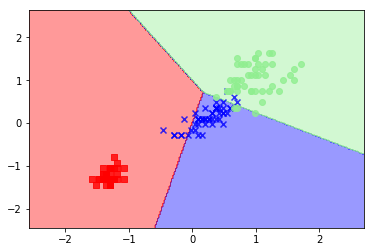

In [8]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.show()

### logistic regression

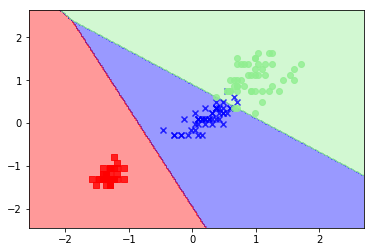

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = lr, test_idx = range(105, 150))
plt.show()

In [10]:
lr.predict_proba(X_test_std[:1])

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01]])

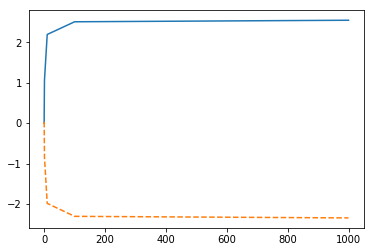

In [11]:
# regulation
# smaller C means larger regulation and smaller parameters
weights, params = [], []
for c in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    lr = LogisticRegression(C = c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(c)
weights = np.array(weights)
plt.plot(params, weights[:,0])
plt.plot(params, weights[:,1], linestyle = '--')
plt.show()

### SVM

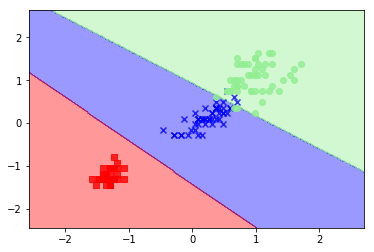

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.show()

In [13]:
# alternative implementation of ppn, lr and svm
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

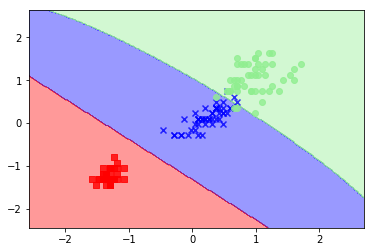

In [14]:
# kernel of SVM
# larger gamma means more curve margin
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.1, C = 10.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.show()

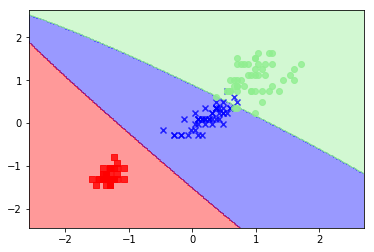

In [29]:
# soft margin
# smaller C means softer margin
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.1, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = svm, test_idx = range(105, 150))
plt.show()

### decision tree
note: tree based algorithms have no need to scale the data

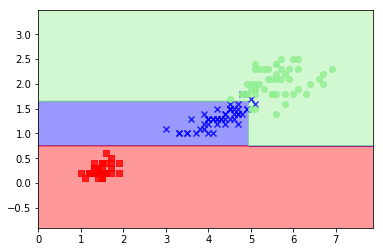

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)
X_combined = np.vstack([X_train, X_test])
y_combined = np.hstack([y_train, y_test])
plot_decision_regions(X = X_combined, y = y_combined, classifier = tree, test_idx = range(105, 150))
plt.show()

In [17]:
# visualize the tree
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', feature_names = ['length', 'width'])
# dot -Tpng tree.dot -o tree.png

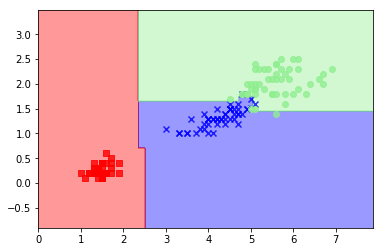

In [30]:
# random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)
plot_decision_regions(X = X_combined, y = y_combined, classifier = forest, test_idx = range(105, 150))

### KNN

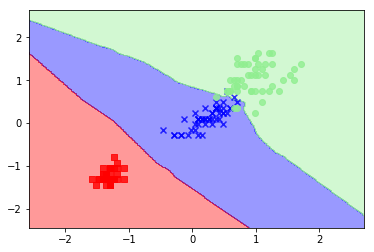

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = knn, test_idx = range(105, 150))

## Ch4 Data Preprocessing

### missing data

In [41]:
# eliminating samples & features
df = pd.DataFrame(np.array([[1,2,3,4],[5,6,np.nan,8],[9,10,11,np.nan]]), columns = ['A','B','C','D'])
print(df.dropna()) #drop rows have null
print(df.dropna(axis = 1)) #drop columns have null
#print(df.dropna(how = 'all')) #drop rows that all features are null
#print(df.dropna(thresh = 4)) #drop rows have at least 4 nulls
print(df.dropna(subset = ['C'])) #drop rows that have nulls in C column

     A    B    C    D
0  1.0  2.0  3.0  4.0
     A     B
0  1.0   2.0
1  5.0   6.0
2  9.0  10.0
     A     B     C    D
0  1.0   2.0   3.0  4.0
2  9.0  10.0  11.0  NaN


In [44]:
# imputing
# stragegy could be median or most_frequent
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr.fit_transform(df)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11.,  6.]])

### handling categorical data

In [72]:
df = pd.DataFrame([['green','M',10.1,'C1'],['red','L',13.5,'C2'],['blue','XL',15.3,'C1']], 
                  columns = ['color','size','price','class'])
df

,color,size,price,class
0,green,M,10.1,C1
1,red,L,13.5,C2
2,blue,XL,15.3,C1


In [73]:
# mapping ordinal features
size_mapping = {'M':1, 'L':2, 'XL':3}
df['size'] = df['size'].map(size_mapping)
print(df)
#inv_size_mapping = {v:k for k,v in size_mapping.items()}
#df['size'] = df['size'].map(inv_size_mapping)
#print(df)

   color  size  price class
0  green     1   10.1    C1
1    red     2   13.5    C2
2   blue     3   15.3    C1


In [74]:
# encoding class labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['class'].values)
print(y)
print(class_le.inverse_transform(y))

[0 1 0]
['C1' 'C2' 'C1']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
# one-hot encoding
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
print(X)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0,1])
ohe.fit_transform(X).toarray()

[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]]


array([[ 0. ,  1. ,  0. ,  1. ,  0. ,  0. , 10.1],
       [ 0. ,  0. ,  1. ,  0. ,  1. ,  0. , 13.5],
       [ 1. ,  0. ,  0. ,  0. ,  0. ,  1. , 15.3]])

In [76]:
# another way to do ohe
pd.get_dummies(df[['color', 'size', 'price', 'class']])

,size,price,color_blue,color_green,color_red,class_C1,class_C2
0,1,10.1,0,1,0,1,0
1,2,13.5,0,0,1,0,1
2,3,15.3,1,0,0,1,0


### bring features onto the same scale